# Task 4

First, update the following cell to have a link to your Homework 1 GitHub repository:

UPDATE THIS LINK:

https://github.com/a-ramji/eds220-hwk-1

In this task, make at least 5 commits at moments you think are adequate. We'll look at your repo to check commit history. Err on the side of commenting too much for now to get in the habit.

Add comments for all your code. Err on the side of commenting too much for now.

Comments in each exercise and commits will count towards your grade.

This task covers topics we will see on Wednesday Oct. 11. You might want to wait until after that class to solve it.

## Acknowledgement
This task was adapted from the *Pandas Fundamentals with Earthquake Data* assignment from the e-book [Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro.html)

## About the data

For this task we are going to use simplified data from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/). This dataset is in tabular format and has the following columns:

- time = date and time of event (all events from 2014)
- latitude = decimal degrees [-90,90]
- longitude = decimal degrees [-360,360]
- depth = depth of the event (km)
- mag =  magnitude of event
- id = event identifier
- place = where the event took place
- type = type of event

## 1 

a. Import pandas (always with standard abbreviation!).

b. Use `pd.read_csv()` to import the `earthquake_data.csv` dataset and store it as `raw_eqk` (variable name).

c. Look at the head of the dataframe.

In [1]:
# importing pandas with standard abbreviations
import pandas as pd

# reading in the data from our data folder within the repository
raw_eqk = pd.read_csv('data/earthquake_data.csv')

# looking at the first 5 rows (index positions 0-4)
raw_eqk.head()

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


## 2
a. Print the shape of the `raw_eqk` dataframe.

b. Print the type of `raw_eqk`'s shape.

c. Print *only* the number of rows by accessing it from `raw_eqk`'s shape. HINT: how do you index an element in a tuple?

In [2]:
# printing the shape (number of rows, number of columns)
print(raw_eqk.shape)

# printing the type (the class is a tuple)
print(type(raw_eqk.shape))

# printing just the number of rows (the first element in the rows, columns output that .shape attribute gives)
print(raw_eqk.shape[0])

(120108, 8)
<class 'tuple'>
120108


## 3

Get the unique values of the type of events.

In [3]:
# output is a list or series of each unique value in the "type" column of our dataset

print(raw_eqk.type.unique())

['earthquake' 'quarry blast' 'quarry' 'mining explosion' 'rock burst'
 'explosion' 'landslide' 'sonicboom' 'sonic boom' 'anthropogenic event'
 'acoustic noise']


# 4

a. Select only earthquake events and store them as `eqk` (variable name)

b. Update the index of `eqk` to be the `id` column of the dataframe. 

c. Check the new index by viewing the first 3 rows of `eqk`.

In [4]:
# raw_eqk[raw_eqk.type == 'earthquake'].head() # checking the output

In [5]:
# raw_eqk.loc[raw_eqk.type == 'earthquake']
# this is another way to achieve the same outcome

In [3]:
# a
# selecting rows where, in the "type" column, values are equal to the string 'earthquake'
eqk = raw_eqk[raw_eqk.type == 'earthquake'] 
eqk.head() # checked the head output of this intermediate step to make sure this step worked

# b
# updating / setting the index to be id column
eqk = eqk.set_index('id') # I looked up the documentation for this :)

# c
# checking the new index by viewing the first 3 rows (index column replaced by id column)
eqk.head(3)

,time,latitude,longitude,depth,mag,place,type
id,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.6717,-149.2528,7.1,1.30,"12km NNW of North Nenana, Alaska",earthquake


# 5

How many events were left out of `raw_eqk` when you selected ony earthqake events? 

HINT: There are *many* ways you can get this information. One could be to use (2).

In [7]:
print(raw_eqk.shape[0]) # printing the number of rows in our original dataset
print('-') # printing a subtraction symbol so the output looks like math
print(eqk.shape[0]) # printing the number of rows in our earthquake subset
print('=') # printing an equals sign to show the output is the result of the math above
print(raw_eqk.shape[0] - eqk.shape[0]) # printing the number of rows or events left out (the difference)

# 1710 events were left out

120108
-
118398
=
1710


# 6
Without creating any new variables, plot a histogram of the eartquake's magnitudes (`eqk` data). Add a title and change the color of your graph.

<AxesSubplot:title={'center':'Distribution of Earthquake Magnitudes'}, ylabel='Frequency'>

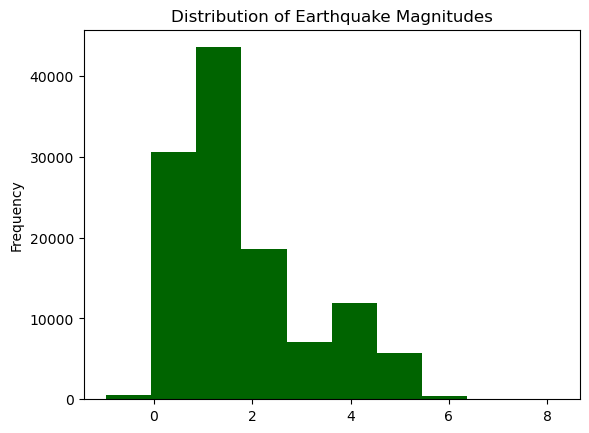

In [8]:
# solve exercise here
eqk.mag.plot(kind='hist', # histogram
             title='Distribution of Earthquake Magnitudes', #updating the title
             color="darkgreen", # customizing the color to my favorite color, dark green
             xlabel='Magnitude' # I tried setting the x-axis label to "Magnitude", but 
                                # this version does not support updating x-axis labels
            )

# 7

a. Create a new variable `top20` with the 20 earthquakes with largest magnitude. HINT: [`pandas.Series.nlargest`](https://pandas.pydata.org/docs/reference/api/pandas.Series.nlargest.html)

b. Create a bar plot showing the magnitude of the top 20 earthquakes. Update the title, x-axis label, y-axis label, and color of the bars. 

c. What is the role of the `top20` index in the graph? What would have happened if we had not updated the index?

<AxesSubplot:title={'center':'Top 20 Earthquakes by Magnitudes'}, xlabel='ID', ylabel='Magnitude'>

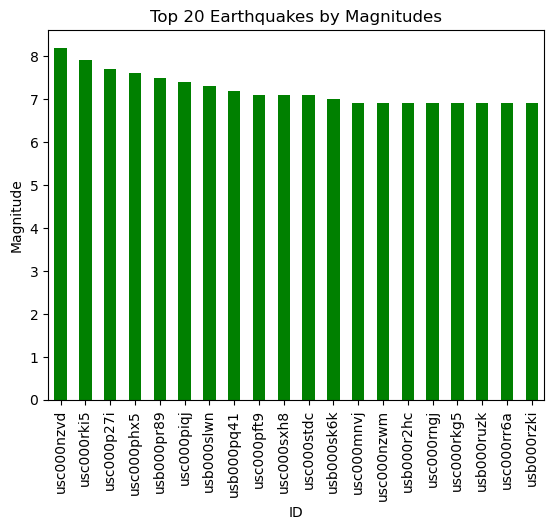

In [9]:
# solve exercise here
top20 = eqk.mag.nlargest(20) # using nlargest to find the top 20 rows with the highest values in the "mag" column

top20.plot(kind='bar', #allows me to flip so that ID is on the y-axis
           x='mag', # setting x-axis to magnitude
           y='id', # makes the IDs more legible to have them on the y-axis, but that didn't work here so I did it in the graph below
           title='Top 20 Earthquakes by Magnitudes', #updating the title
           #ylabel='Magnitude',
           xlabel='ID', # updating the x-axis label
           ylabel='Magnitude', # updating the y-axis label
           color='green' # choosing a nice color
          )

<AxesSubplot:title={'center':'Top 20 Earthquakes by Magnitudes'}, ylabel='ID'>

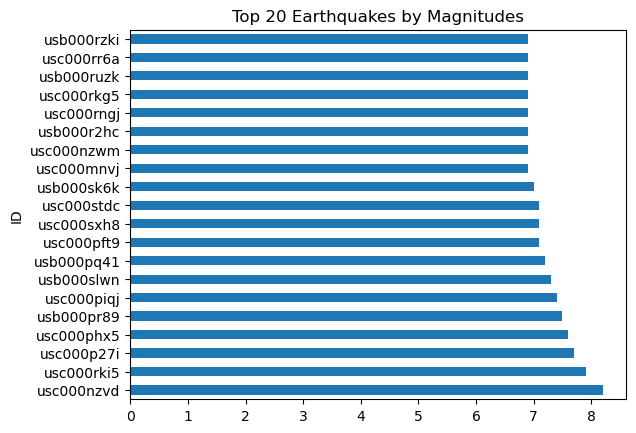

In [12]:
# trying to flip the x and y axes (couldn't do it in kind=bar)
top20 = eqk.mag.nlargest(20) # using nlargest to find the top 20 rows with the highest values in the "mag" column

top20.plot(kind='barh', #allows me to flip so that ID is on the y-axis! yay!
           x='mag', # magnitude variable mapped to x-axis
           y='id', # makes the IDs more legible if they're horizontal (y-axis)
           title='Top 20 Earthquakes by Magnitudes', # updating the title
           #ylabel='Magnitude', # this didn't work, old version. 
           xlabel='ID'
         #  ylabel='Magnitude' # it won't let me add an x-axis label in this version
          )

c. What is the role of the top20 index in the graph? What would have happened if we had not updated the index?


The role of the index is to easily identify each earthquake with their unique ID on the graph. If we had not updated the index, we would not see the ID of each earthquake and would only see the row indices, which is not very helpful, as we want to show which uniquely ID-ed earthquake had the highest magnitudes. 

# 8 
We are interested in place, magnitude and depth of the top 20 earthquakes with largest magnitude. Select this data from the `eqk` data frame.

HINT: This is a "select rows and columns simultaneously" from `eqk` exercise. To select the rows you could use the index of `top20`.

In [10]:
eqk.loc[top20.index,  # using the index location of our top20 subset to select the rows
        ['place', 'mag', 'depth']] # passing a list of our desired columns to the column-selection argument
# output represents selected rows and columns of our eqk subset, but not assigned to a variable name (like top20 or eqk)

,place,mag,depth
id,,,
usc000nzvd,"94km NW of Iquique, Chile",8.2,25.00
usc000rki5,"19km SE of Little Sitkin Island, Alaska",7.9,109.00
usc000p27i,"53km SW of Iquique, Chile",7.7,22.40
usc000phx5,"93km SSE of Kirakira, Solomon Islands",7.6,22.56
usb000pr89,"70km SW of Panguna, Papua New Guinea",7.5,43.37
usc000piqj,"112km S of Kirakira, Solomon Islands",7.4,39.00
usb000slwn,"74km S of Intipuca, El Salvador",7.3,40.00
usb000pq41,"33km ESE of Petatlan, Mexico",7.2,24.00
usc000pft9,"56km WSW of Panguna, Papua New Guinea",7.1,60.53


# 9 

Without creating any new variables, visualize the locations of eartquakes with magnitude greter than 5 by creating a scatter plot of their latitude and longitude. Make the following adjustments to the basic plot:
- update the title
- color the points by magnitude (HINT: [check the `c` parameter here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html))
- adjust the `alpha` (transparency) argument
- adjust the `colormap` argument to maket it look prettier. [Click for ideas of sequential colormaps.](https://matplotlib.org/stable/users/explain/colors/colormaps.html)


<AxesSubplot:title={'center':'Locations of Earthquakes with Magnitude > 5.0'}, xlabel='Longitude', ylabel='Latitude'>

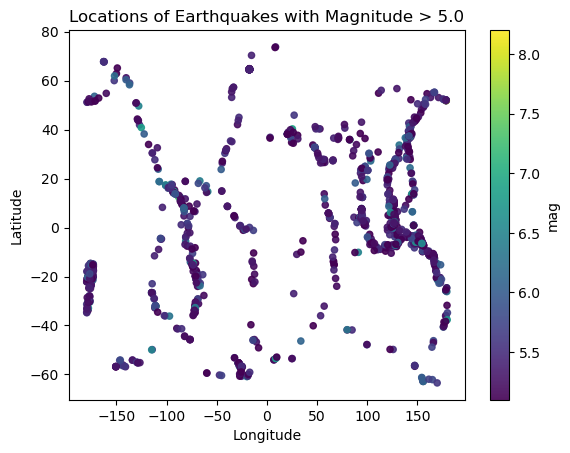

In [11]:
# solve exercise here

eqk[(eqk.mag > 5.0)].plot(kind='scatter', # scatterplot
                          x='longitude', # unintuitive for me, but as we move along the x-axis, 
                          y='latitude', # we're moving along different lines of Longitude, and vice versa with Latitude
                          title='Locations of Earthquakes with Magnitude > 5.0',  # updating the title
                          c='mag', # color by magnitude
                          alpha=0.9, # anything lighter doesn't show up very well
                          colormap='viridis', # colorblind friendly map for accessibility 
                          # I tried out a lot of color schemes and didn't like most of them.
                          # Viridis and "inferno" were my favorites
                          xlabel="Longitude", # updating x-axis label
                          ylabel="Latitude" # and y-axis label
                         )